# Finding best model parameters in scikit learn
### Parameter tuning using GridSearchCV and KNN classifier

In [3]:
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
import pandas as pd
import scipy

In [4]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
k=range(1,31)
param_grid=dict(n_neighbors=k)
print param_grid


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [6]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)
grid.grid_scores_ #shows the score against each parameter

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [7]:
print grid.grid_scores_[19].parameters
print grid.grid_scores_[19].cv_validation_scores
print grid.grid_scores_[19].mean_validation_score

{'n_neighbors': 20}
[ 1.          0.93333333  1.          1.          1.          0.93333333
  0.93333333  1.          1.          1.        ]
0.98


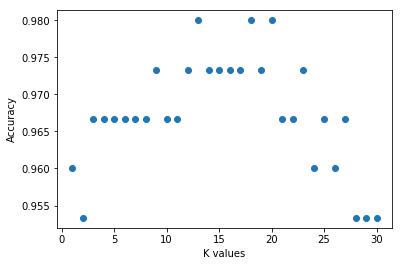

In [8]:
gmean=[result.mean_validation_score for result in grid.grid_scores_]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k, gmean,'o')
plt.xlabel("K values")
plt.ylabel("Accuracy")

In [9]:
print grid.best_estimator_
print grid.best_params_
print grid.best_score_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'n_neighbors': 13}
0.98


In [10]:
grid.predict([[1,2,3,4],[4,3,2,1]])

array([1, 0])